# To start with some concrete directions, we can reproduce the predictions of my earlier work.

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns
import plotly.express as px

import numpy as np
import pandas as pd
import polars as pl

import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib
import glob
import torch

## Impact of loss, training distribution on output distribution

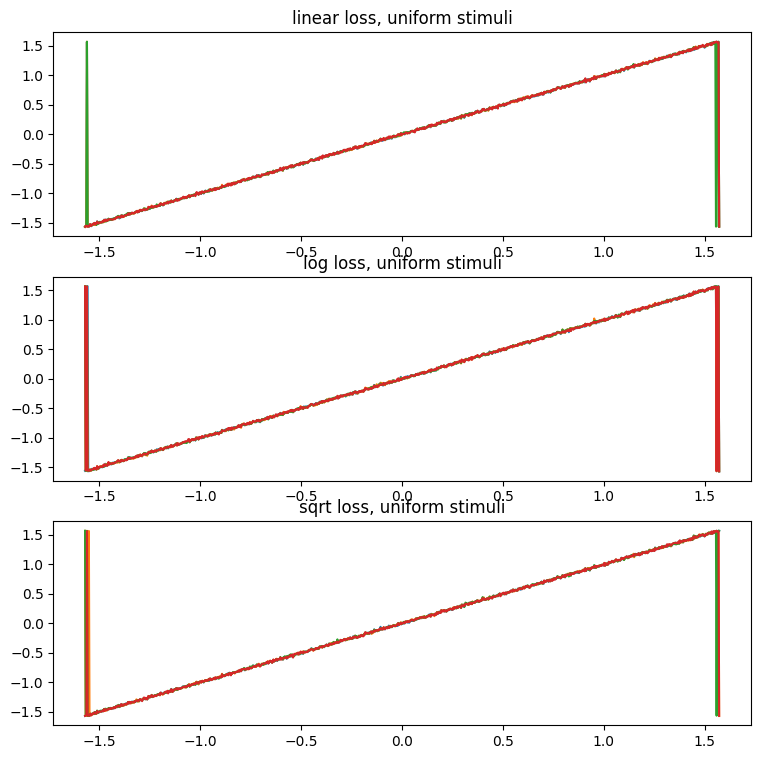

In [50]:
# effects of uniform training

base_dir = 'trainedParameters/Exp7/uniform/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 1001)
stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        plt.subplot(3,1,i+1)
        plt.plot(thetas, outputs.cpu().detach().numpy())

        if rep == 0:
            plt.title(name + ' loss, uniform stimuli')



In [26]:
model = EstimateAngle.load_from_checkpoint( 'trainedParameters/Exp7/uniform/linear/rep0/epoch=255-step=32768.ckpt')

In [38]:
outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))

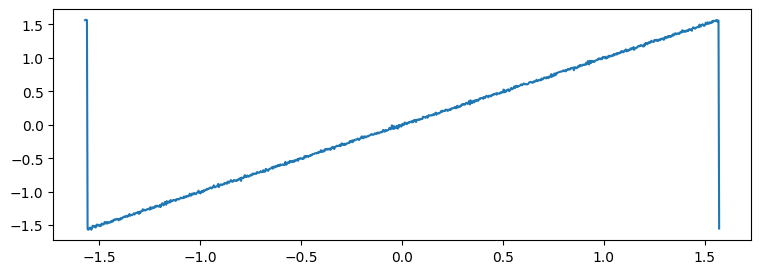

In [42]:
plt.plot(thetas, outputs.cpu().detach().numpy())

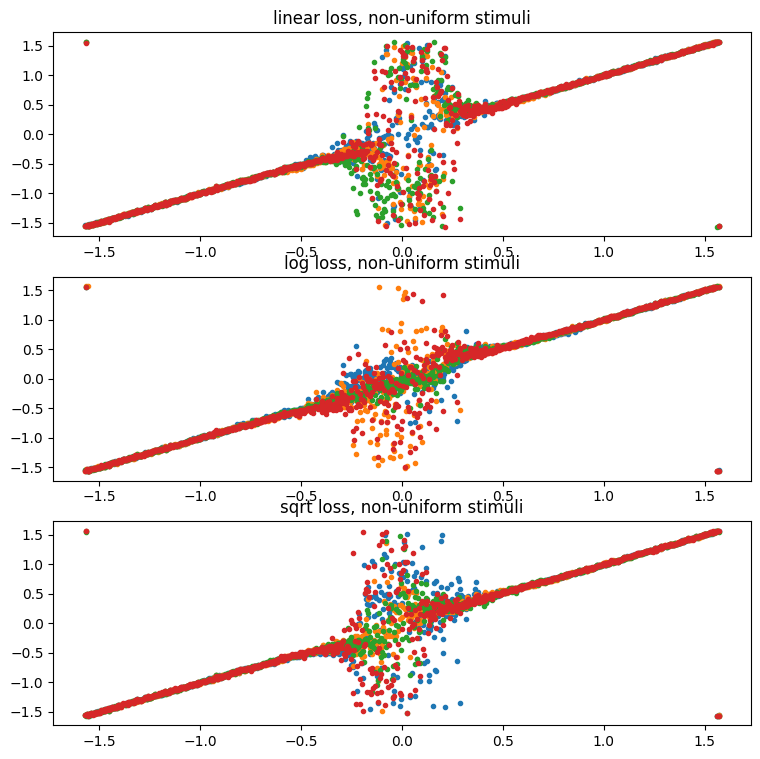

In [53]:
# effects of concentrated training

base_dir = 'trainedParameters/Exp7/concentrated/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 1001)
stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        plt.subplot(3,1,i+1)
        plt.plot(thetas, outputs.cpu().detach().numpy(), '.')

        if rep == 0:
            plt.title(name + ' loss, non-uniform stimuli')

This is quite interesting, and not what I expected to see: there is a loss of continuity near zero, but it is linear otherwise.

Note the simuli were concentrated around pi/2! so the continuity loss is probabily due to simple under sampling.
There does not seem to be much in the way of a 'warping' effect resulting from the different training distributions.

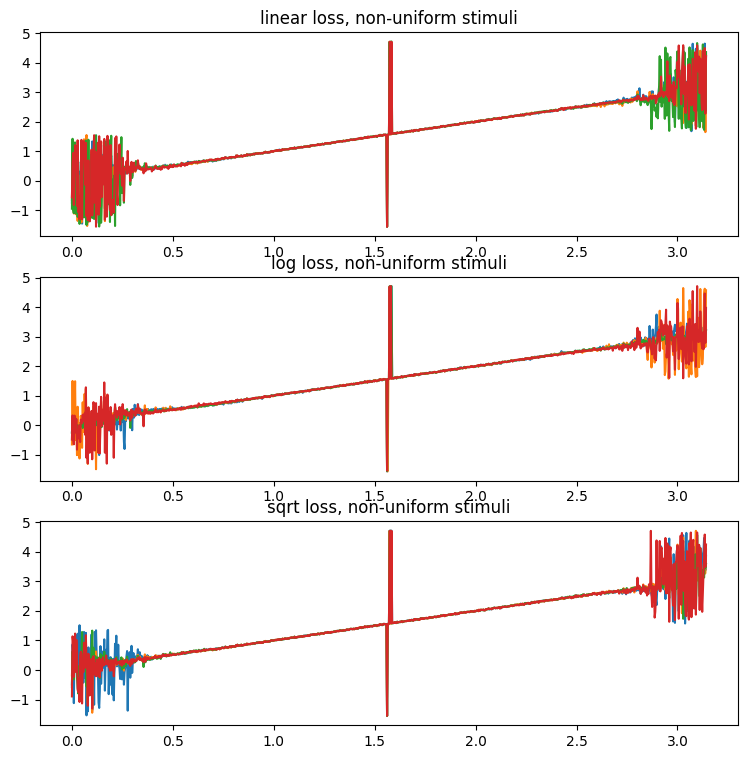

In [61]:
# effects of concentrated training

base_dir = 'trainedParameters/Exp7/concentrated/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(0, np.pi, 1001)
stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        plt.subplot(3,1,i+1)

        recode = np.zeros(1001)
        recode[500:] = np.pi
        plt.plot(thetas, outputs.cpu().detach().numpy() + recode)

        if rep == 0:
            plt.title(f'{name} loss, non-uniform stimuli')

Yeah, so shifting the domain, we see that the distribution remains essentially a unifrom distribution of outputs.

### Does the concentrated training impact the output distribution for non-uniform input distributions?

No, it must not: there is a linear input-output mapping, so the output distribution should remain the same as the input distribution regardless of what that distribution is.

However, we have previously seen that the Fisher information _is_ impacted by the distribution that we train on...

That would seem to imply that the Fisher information analysis is critical: the Fisher information is changing even when the mean isn't

## What about the magnitude of the encoded vector?

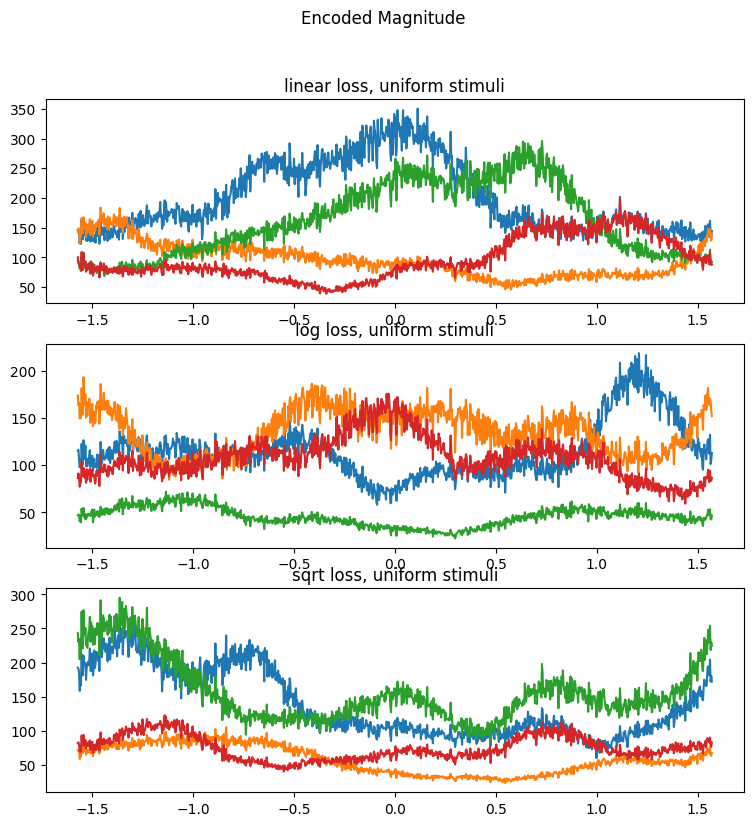

In [72]:
# effects of uniform training

base_dir = 'trainedParameters/Exp7/uniform/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)

plt.suptitle('Encoded Magnitude')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 1001)
stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = torch.norm(model.forward(stimuli.to(model.device)), dim=1)
        plt.subplot(3,1,i+1)
        plt.plot(thetas, outputs.cpu().detach().numpy())

        if rep == 0:
            plt.title(name + ' loss, uniform stimuli')

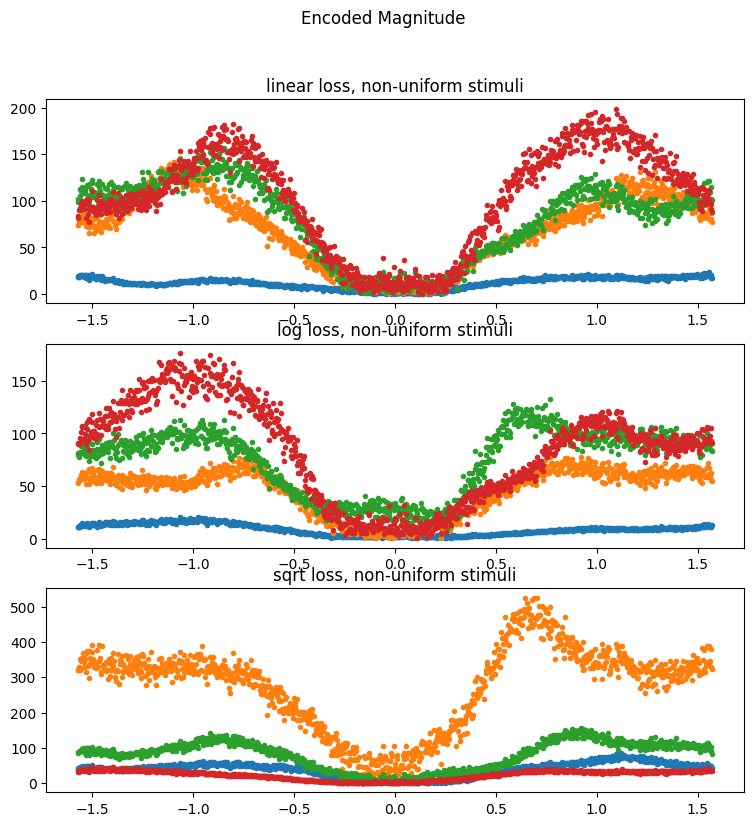

In [76]:
# effects of concentrated training

base_dir = 'trainedParameters/Exp7/concentrated/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)

plt.suptitle('Encoded Magnitude')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 1001)
stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = torch.norm(model.forward(stimuli.to(model.device)), dim=1)
        plt.subplot(3,1,i+1)
        plt.plot(thetas, outputs.cpu().detach().numpy(), '.')

        if rep == 0:
            plt.title(name + ' loss, non-uniform stimuli')

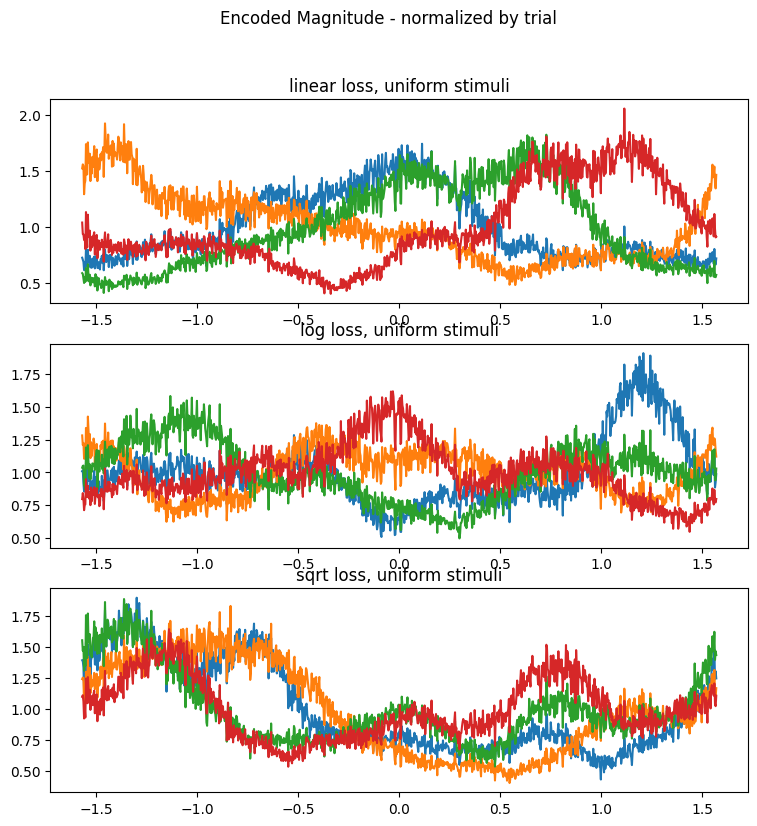

In [81]:
# effects of uniform training

base_dir = 'trainedParameters/Exp7/uniform/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)

plt.suptitle('Encoded Magnitude - normalized by trial')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 1001)
stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = torch.norm(model.forward(stimuli.to(model.device)), dim=1)
        outputs = outputs / outputs.mean()
        plt.subplot(3,1,i+1)
        plt.plot(thetas, outputs.cpu().detach().numpy())

        if rep == 0:
            plt.title(name + ' loss, uniform stimuli')

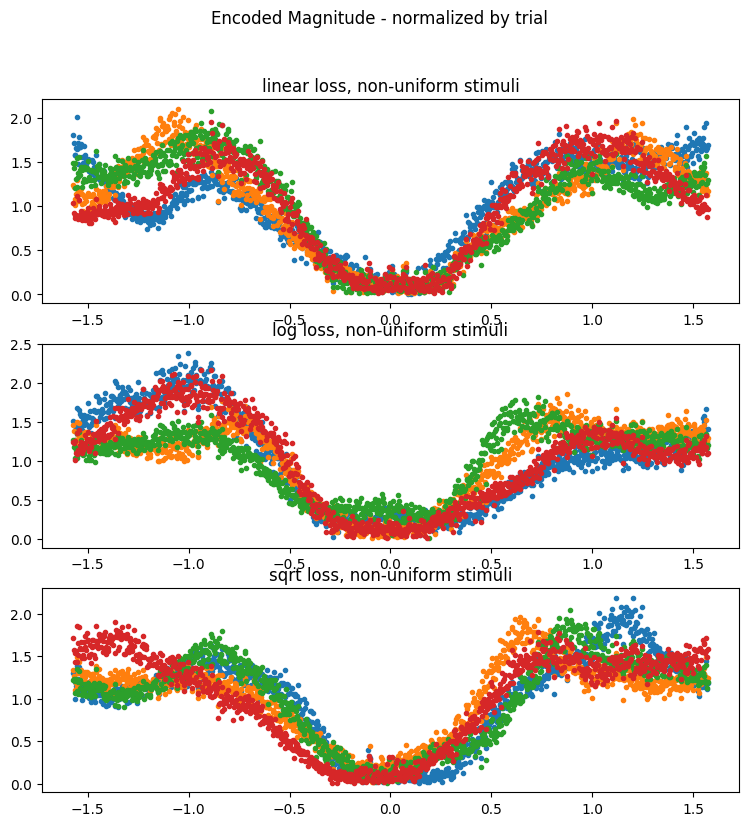

In [82]:
# effects of concentrated training

base_dir = 'trainedParameters/Exp7/concentrated/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)

plt.suptitle('Encoded Magnitude - normalized by trial')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 1001)
stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = torch.norm(model.forward(stimuli.to(model.device)), dim=1)
        outputs = outputs / outputs.mean()
        plt.subplot(3,1,i+1)
        plt.plot(thetas, outputs.cpu().detach().numpy(), '.')

        if rep == 0:
            plt.title(name + ' loss, non-uniform stimuli')

This is rather interesting: we can see that the magnitude does systematically with the input probabilities. Note that there are _few_ samples near zero, where the magnitude is small, as we might expect.

However, the variation in the magnitude away from zero seems, for the most part, to be within the bounds of magnitude variation for the uniform distribution (could be slightly bigger but not worth checking out at the moment). In other words, the magnitude only gets small where samples are very rare. 

This is exactly the same region where the variance of the predictions gets large.

## Impact on level of variation

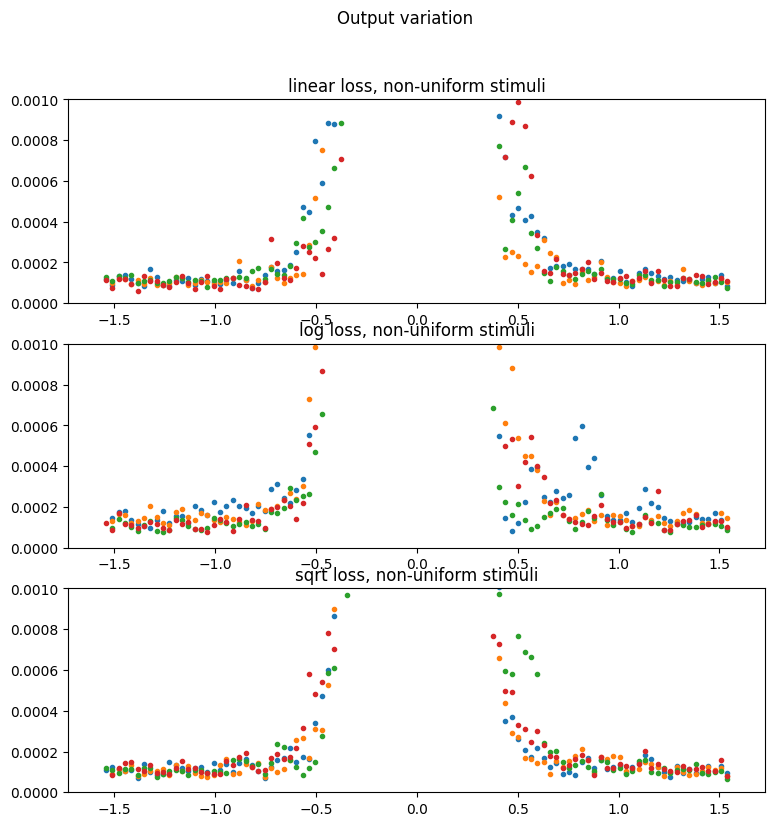

In [152]:
# effects of concentrated training

base_dir = 'trainedParameters/Exp7/concentrated/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)
plt.suptitle('Output variation')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 101).repeat(100,1)
thetas = thetas.reshape(-1)

stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        
        outputs = outputs.cpu().reshape(100, 101)
        t2 = thetas.reshape((100, 101)).mean(dim=0)

        plt.subplot(3,1,i+1)
        plt.plot(t2, torch.var(outputs, dim=0).detach().numpy() , '.')

        if rep == 0:
            plt.title(name + ' loss, non-uniform stimuli')
            plt.ylim([0, 0.001])

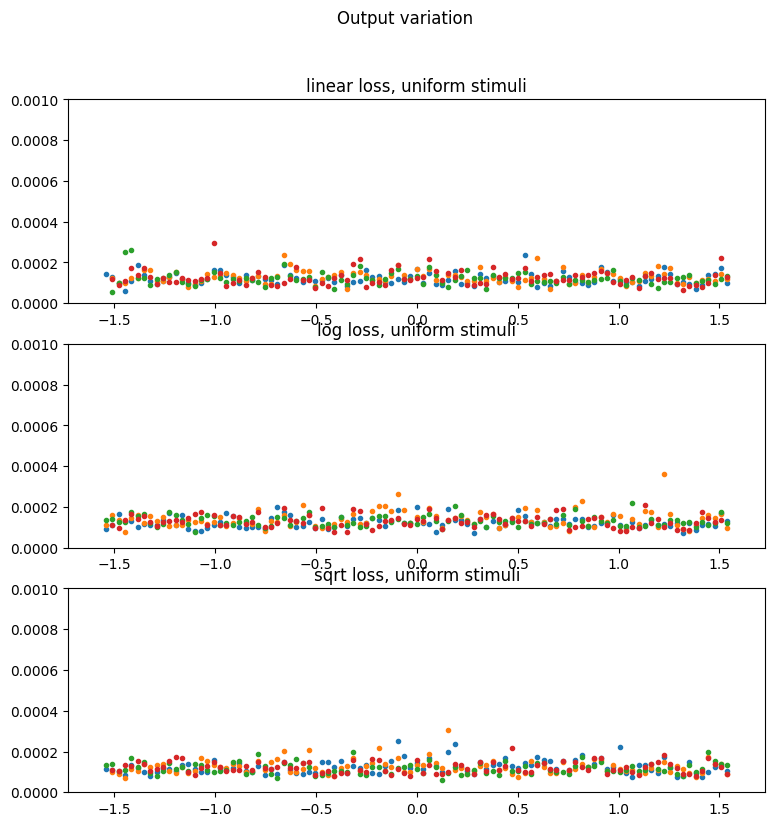

In [153]:
# effects of concentrated training

base_dir = 'trainedParameters/Exp7/uniform//'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)
plt.suptitle('Output variation')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 101).repeat(100,1)
thetas = thetas.reshape(-1)

stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        
        outputs = outputs.cpu().reshape(100, 101)
        t2 = thetas.reshape((100, 101)).mean(dim=0)

        plt.subplot(3,1,i+1)
        plt.plot(t2, torch.var(outputs, dim=0).detach().numpy() , '.')

        if rep == 0:
            plt.title(name + ' loss, uniform stimuli')
            plt.ylim([0, 0.001])

#### Note the axis scale.

Here we can see just how tiny the ouput variance is, even for networks that are trained with a concentrated distribution!

In other words, the error rate is very low across _all_ inputs with a reasonable number of training samples. That is to say, the network generalizes well to different input distributions.

## What about the mean square error?

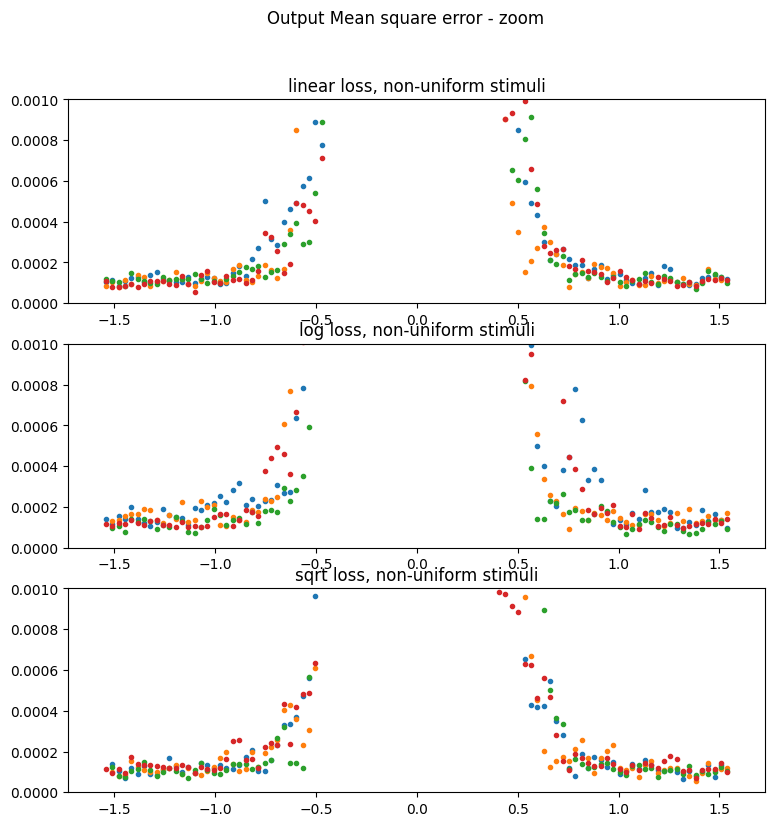

In [149]:
base_dir = 'trainedParameters/Exp7/concentrated/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)
plt.suptitle('Output Mean square error - zoom')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 101).repeat(100,1)
thetas = thetas.reshape(-1)

stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        errors = ((outputs.cpu() - thetas)**2).reshape(100, 101).mean(dim=0)
        t2 = thetas.reshape((100, 101)).mean(dim=0)

        plt.subplot(3,1,i+1)
        plt.plot(t2, errors.detach().numpy() , '.')

        if rep == 0:
            plt.title(name + ' loss, non-uniform stimuli')
            plt.ylim([0, 0.001])

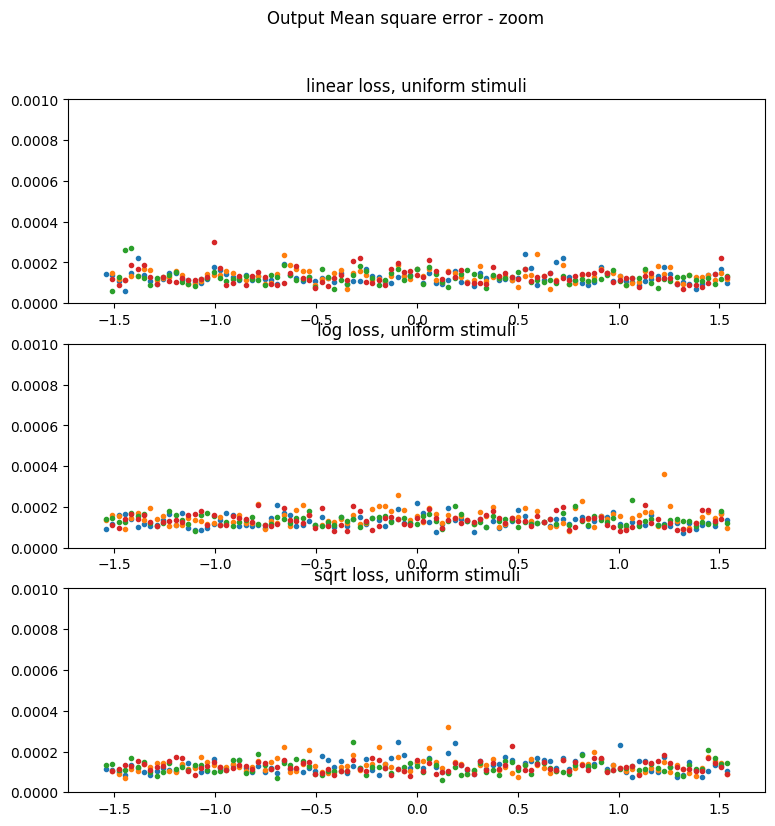

In [155]:
base_dir = 'trainedParameters/Exp7/uniform/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)
plt.suptitle('Output Mean square error - zoom')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 101).repeat(100,1)
thetas = thetas.reshape(-1)

stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        errors = ((outputs.cpu() - thetas)**2).reshape(100, 101).mean(dim=0)
        t2 = thetas.reshape((100, 101)).mean(dim=0)

        plt.subplot(3,1,i+1)
        plt.plot(t2, errors.detach().numpy() , '.')

        if rep == 0:
            plt.title(name + ' loss, uniform stimuli')
            plt.ylim([0, 0.001])

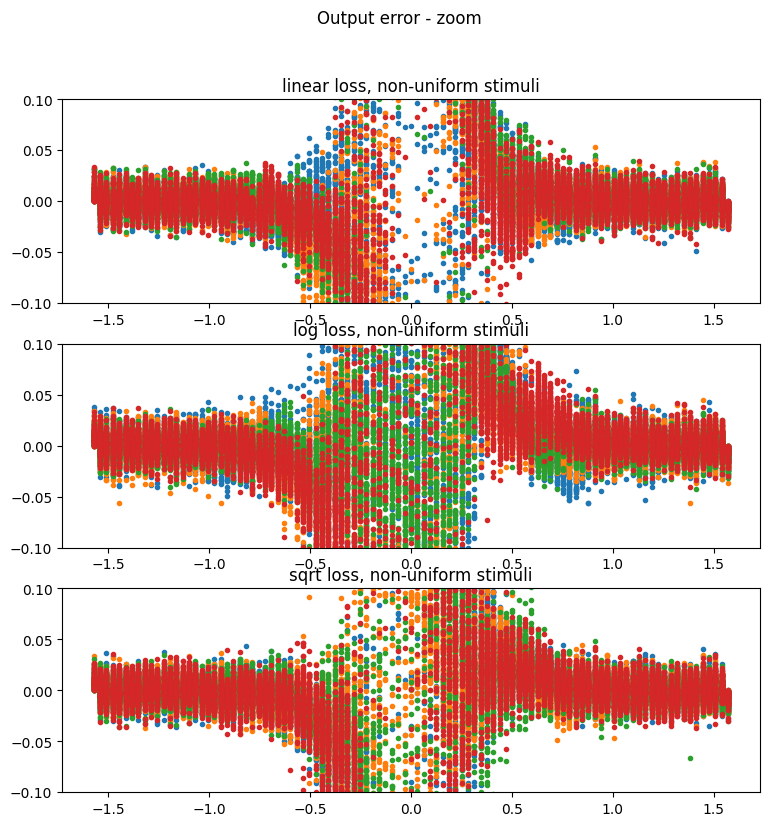

In [154]:
base_dir = 'trainedParameters/Exp7/concentrated/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)
plt.suptitle('Output error - zoom')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 101).repeat(100,1)
thetas = thetas.reshape(-1)

stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        errors = (outputs.cpu() - thetas)

        plt.subplot(3,1,i+1)
        plt.plot(thetas, errors.detach().numpy() , '.')

        if rep == 0:
            plt.title(name + ' loss, non-uniform stimuli')
            plt.ylim([-0.1, 0.1])

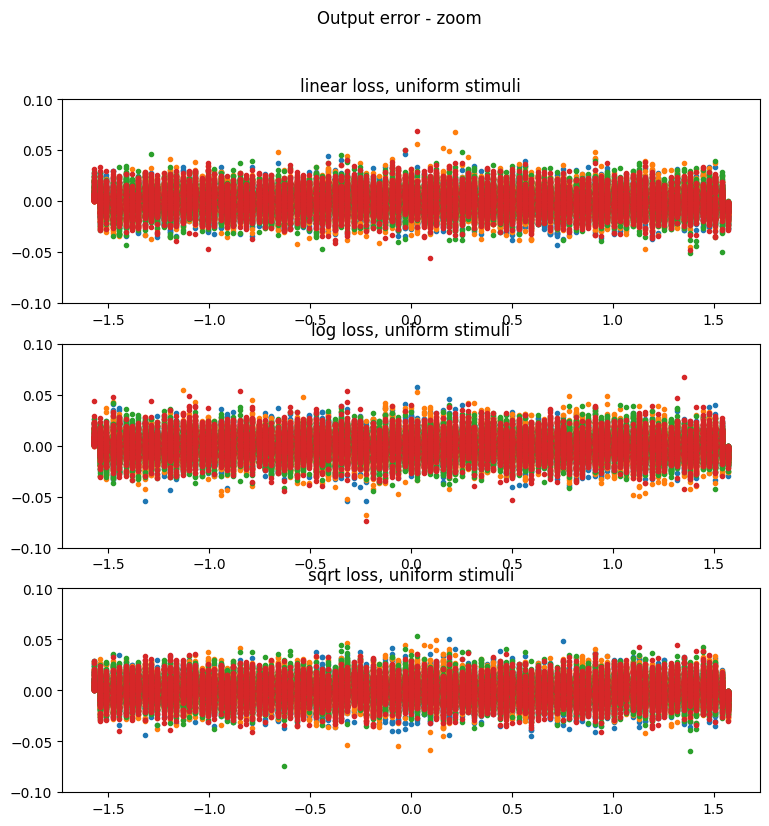

In [156]:
base_dir = 'trainedParameters/Exp7/uniform/'

from basicModel import EstimateAngle
from datageneration.stimulusGeneration import generateGrating

figsize(9,9)
plt.subplots(3,1)
plt.suptitle('Output error - zoom')

defaultConfig = {'pixelDim': 101,'shotNoise': 0.8, 'noiseVar': 20.}
thetas = torch.linspace(-np.pi/2, np.pi/2, 101).repeat(100,1)
thetas = thetas.reshape(-1)

stimuli = generateGrating(thetas, **defaultConfig)

for rep in range(4):
    for i, name in enumerate(['linear', 'log', 'sqrt']):
        ckpt = glob.glob(base_dir + f'{name}/rep{rep}/*')[0]
        model = EstimateAngle.load_from_checkpoint(ckpt)

        outputs = model.decodeAngles(model.forward(stimuli.to(model.device)))
        errors = (outputs.cpu() - thetas)

        plt.subplot(3,1,i+1)
        plt.plot(thetas, errors.detach().numpy() , '.')

        if rep == 0:
            plt.title(name + ' loss, uniform stimuli')
            plt.ylim([-0.1, 0.1])

### Good generalization performance across stimulus distributions

This is another way of seeing the same thing: the outputs are really very good, outside of the stimulus region that is rarely sampled. (Aside: There might be a hint of different extrapolations to the rarely sampled regions with different loss functions.)

The key point is: there is little (no) improvement in accuracy in the the regions that are heavily sampled relative to the uniform case. In other words, the uniform stimulus distribution case essentially achieves the performance limit everywhere: a network specialized for a concentrated stimulus distribution does not gain any benefits in exchange for the losses that it suffers in the under-sampled regions.

What does this mean? Does it mean that the task is too easy? A more difficult task / less expressive network should see improvements from focusing on a specific region. Alternatively, it could also mean that there is an improvement that comes from the symmetry / uniformity of the training data, whose loss compensates the increase performance. This doesn't seem super likely here.